<a href="https://colab.research.google.com/github/igharsha7/iHub-AIML-Program-2025/blob/main/AIML_Module_3_Lab_3_Implementing_KNN_from_scratch_and_visualize_Algorithm_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
### MODULE 3: CLASSIFICATION-1
### LAB-3 : Implementing KNN from scratch and visualize Algorithm performance

---

# **Section 1: Implementing KNN**

In the last lab we had started discussing about KNN or K Nearest Neighbour method for clasification. We used the pre-built scikit-learn library for KNN. Now let's see how to implement this algorithm from scratch  

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [2]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [3]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

**Note** : If k = 1 then the algorithm will simply return the label of the nearest neighbour. When we give k > 1 the most common label out of the given labels in the k neighbours will be selected.The code for 1 NN is given as follows and does not have to be so complicated.

In [4]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [5]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

## Section 1.1 - Iris Dataset
Let's try it out on Iris Dataset present in the scikit learn library

In [6]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [8]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 94.0 %


Voila! You have implemented your own version of the K-Nearest Neighbours algorithm, which works very well on the Iris Dataset. Congratulations!  

Now try out the sklearn implementation and compare your results.  

In [9]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 94.0 %


##  Section 1.2: Weighted NN
For KNN, If k is too small, the algorithm would be more sensitive to outliers. If k is too large, then the neighborhood may include too many points from other classes. We also take the label with max votes in the neighbourhood. Another choice can be that instead of giving equal weights to each of the neighbours we can give weighted points in the neighbourhood. So we weigh points by the inverse of their distance. Therefore, closer points will be given a higher priority as compared to the far off points.

An easy way to implement this is by specifying the 'weights' parameter as distance when defining the sklearn KNN function. For more information go through this [site](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [10]:
## TASK
## Modify the KNN function you wrote to return all the K-nearest neighbours along with their distances,
## instead of just the output that was most common. You don't need to find out accuracy, just modify the function
## and return the k-nearest neighbours and distances.

In [11]:
def predict_with_neighbors(X_train, y_train, X_test, k):
    """
    Modified predict function that returns all K-nearest neighbors along with their distances
    instead of just the most common output.

    Parameters:
    X_train: Training features
    y_train: Training labels
    X_test: Single test sample
    k: Number of nearest neighbors

    Returns:
    neighbors: List of tuples containing (distance, label, index) for each of the k nearest neighbors
    """
    distances = []

    for i in range(len(X_train)):
        distance = np.sqrt(np.sum(np.square(X_test - X_train[i, :])))
        distances.append([distance, i])


    distances = sorted(distances)

    neighbors = []
    for i in range(k):
        distance = distances[i][0]
        index = distances[i][1]
        label = y_train[index]
        neighbors.append((distance, label, index))

    return neighbors


def k_nearest_neighbor_with_neighbors(X_train, y_train, X_test, k):
    """
    Modified KNN function that returns all K-nearest neighbors for each test sample

    Parameters:
    X_train: Training features
    y_train: Training labels
    X_test: Test features
    k: Number of nearest neighbors

    Returns:
    all_neighbors: List where each element contains the k nearest neighbors for each test sample
    """
    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    all_neighbors = []
    for i in range(len(X_test)):
        neighbors = predict_with_neighbors(X_train, y_train, X_test[i, :], k)
        all_neighbors.append(neighbors)

    return all_neighbors


# Example usage with a single test sample to demonstrate the output
print("Example usage of the modified KNN function:")
print("=" * 50)


from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["target"] = data.target

X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)


test_sample = X_test[0:1]
neighbors = k_nearest_neighbor_with_neighbors(X_train, y_train, test_sample, k=5)

print(f"For test sample: {test_sample[0]}")
print(f"The 5 nearest neighbors are:")
print("Distance\tLabel\tIndex")
print("-" * 30)
for distance, label, index in neighbors[0]:
    print(f"{distance:.4f}\t\t{label}\t{index}")

print(f"\nActual label for this test sample: {y_test[0]}")

Example usage of the modified KNN function:
For test sample: [5.4 3.9 1.3 0.4]
The 5 nearest neighbors are:
Distance	Label	Index
------------------------------
0.3464		0	87
0.3873		0	28
0.4123		0	36
0.4583		0	44
0.4583		0	80

Actual label for this test sample: 0


# **Section 2: Visualizing Data**  

We will look into something called **Voronoi** diagrams.  

**Note**: Ideally, we should perform data visualization to see what the data looks like before we apply any Machine Learning algorithm.  Only for the purpose of this lab session, we're explaining it after you've applied KNN.

### Voronoi Diagrams  

In simple terms, Voronoi diagrams help you to visualize the dataset by partioning the plane into regions that are close to a given set of points. These regions are also called Voronoi cells.  

Note that the cells/regions depend on the Distance metric being used. One way of interpreting this is by understanding that the distance metric decides the degree to which a 'point' or 'seed' in the Voronoi diagram has influence.  For each seed there is a corresponding region, called a Voronoi cell, consisting of all points of the plane closer to that seed than to any other.

This [link](https://en.wikipedia.org/wiki/Voronoi_diagram#Illustration) provides a wonderful illustration of Voronoi plots for 20 points in two cases: (1) Using Euclidean distance, and (2) Using Manhattan distance.  



Since our Iris data is 4-dimensional (as it has 4 attributes), we need to convert into a form that can be represented in 2-D.   

While there are methods to visualize data higher than 2-dimensions, that is beyond scope for now.  

For simplicity, we just take the first two columns of the iris dataset attributes and observe the Voronoi diagram generated for that.  
Alternatively, one can also perform PCA (Principal Component Analysis), to reduce the 4D data to just two dimensions.

In [18]:
#@title Plotting Voronoi regions
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = np.ptp(vor.points).max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

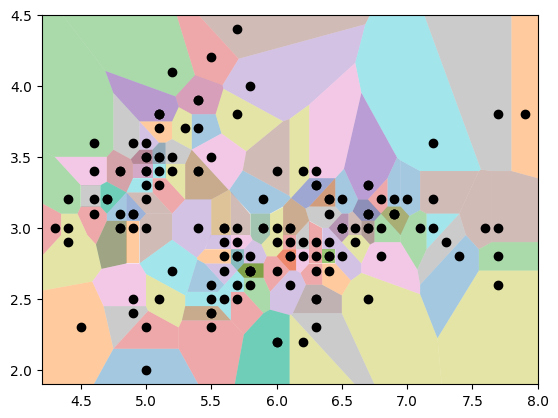

In [19]:
## Plotting Voronoi regions for the Iris dataset

points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
# print(points)
points = np.array(points)
# compute Voronoi tesselation
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

## Section 2.2: Understanding Decision Boundaries  
So you have seen the Voronoi diagram of the dataset, implemented KNN, and also seen your algorithm's performance in terms of accuracy? Impressive!  
Wouldn't it also be great to know how exactly these 'votes' or neighbours are decided through some kind of visualization?  


### Decision Boundary

While the Voronoi diagram gave us a good idea of the points present in our dataset, to understand how KNN performed on our dataset we can plot decision boundaries. Decision boundaries, as the name suggests, divide the plane into different regions of classification.  

Note that here again, for simplicity, we have only considered first two attributes of the DataFrame (ie, Sepal Length and Sepal Width).  

In [20]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()


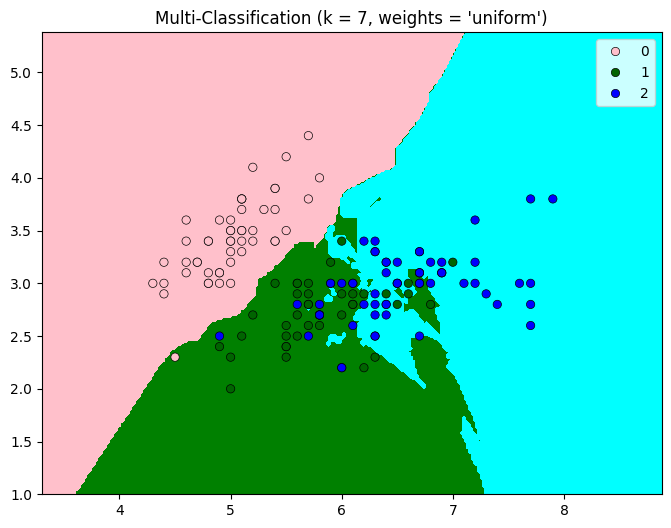

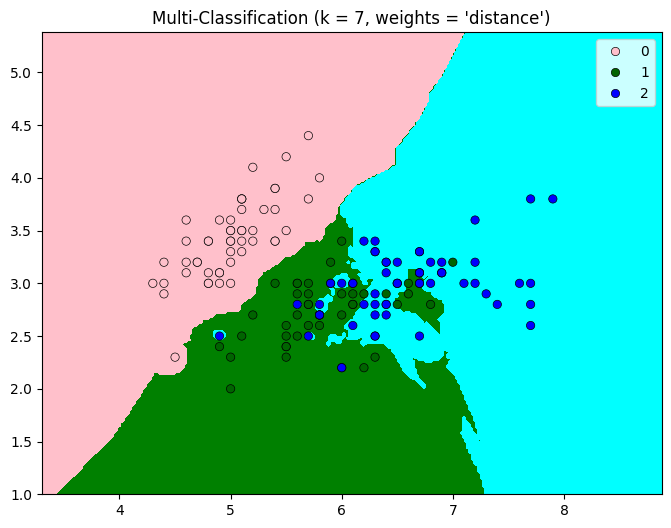

In [21]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

In [ ]:
## TASK-2
## In the above cells, we saw the Voronoi diagram of the data and plotted the KNN decision boundaries
## by only considering two attributes of the dataset. You must be already familiar with PCA.
## Apply PCA on the dataset above to reduce it to two dimensions.
## Plot the Voronoi diagram and Decision boundaries after that.

In [22]:
# TASK-2 Solution: Apply PCA and visualize with Voronoi diagram and Decision boundaries

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
import seaborn as sns
from matplotlib.colors import ListedColormap

print("Original dataset shape:", X.shape)

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

print("Dataset shape after PCA:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

print("\nFirst few rows of PCA-transformed data:")
print(df_pca.head())

Original dataset shape: (150, 4)
Dataset shape after PCA: (150, 2)
Explained variance ratio: [0.92461872 0.05306648]
Total explained variance: 0.9776852063187977

First few rows of PCA-transformed data:
        PC1       PC2  target
0 -2.684126  0.319397       0
1 -2.714142 -0.177001       0
2 -2.888991 -0.144949       0
3 -2.745343 -0.318299       0
4 -2.728717  0.326755       0


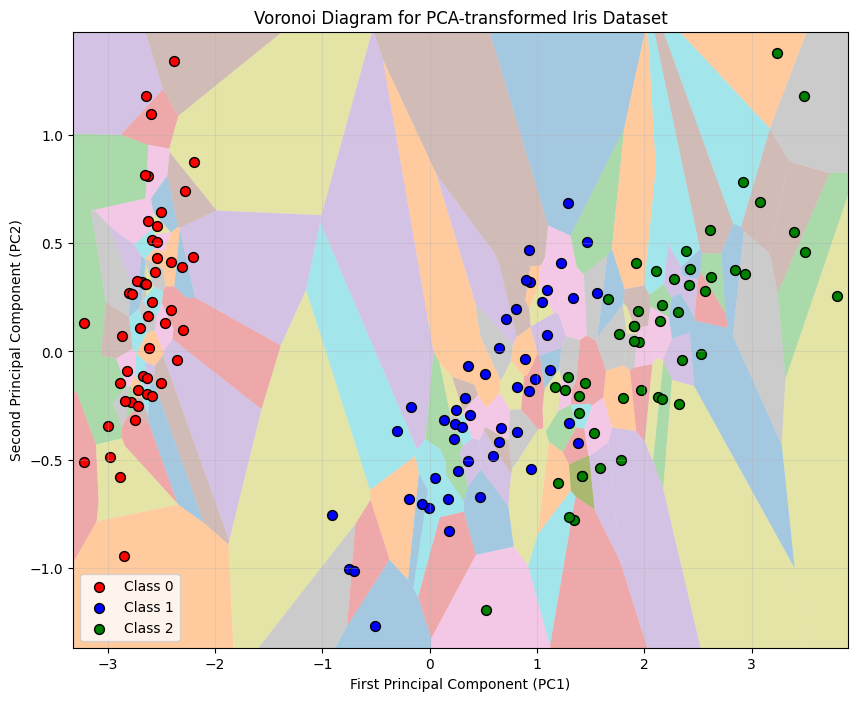

In [23]:
# Plot Voronoi diagram for PCA-transformed data

def voronoi_finite_polygons_2d_pca(vor, radius=None):
    """
    Modified Voronoi function compatible with NumPy 2.0
    """
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = np.ptp(vor.points).max()

    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            new_regions.append(vertices)
            continue

        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                continue

            t = vor.points[p2] - vor.points[p1]
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

points_pca = X_pca

# Compute Voronoi tessellation
vor_pca = Voronoi(points_pca)

# Get finite regions
regions_pca, vertices_pca = voronoi_finite_polygons_2d_pca(vor_pca)

# Plot Voronoi diagram
plt.figure(figsize=(10, 8))

for region in regions_pca:
    polygon = vertices_pca[region]
    plt.fill(*zip(*polygon), alpha=0.4)

# Plot the data points colored by class
colors = ['red', 'blue', 'green']
for i in range(3):
    class_points = X_pca[y == i]
    plt.scatter(class_points[:, 0], class_points[:, 1],
               c=colors[i], label=f'Class {i}', s=50, edgecolor='black')

plt.xlim(vor_pca.min_bound[0] - 0.1, vor_pca.max_bound[0] + 0.1)
plt.ylim(vor_pca.min_bound[1] - 0.1, vor_pca.max_bound[1] + 0.1)
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.title('Voronoi Diagram for PCA-transformed Iris Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

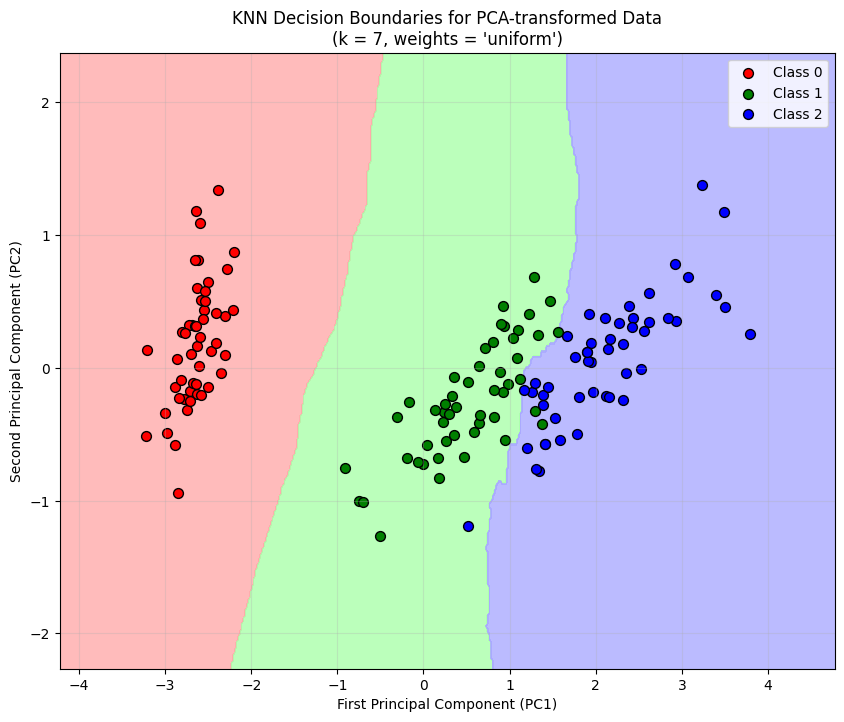

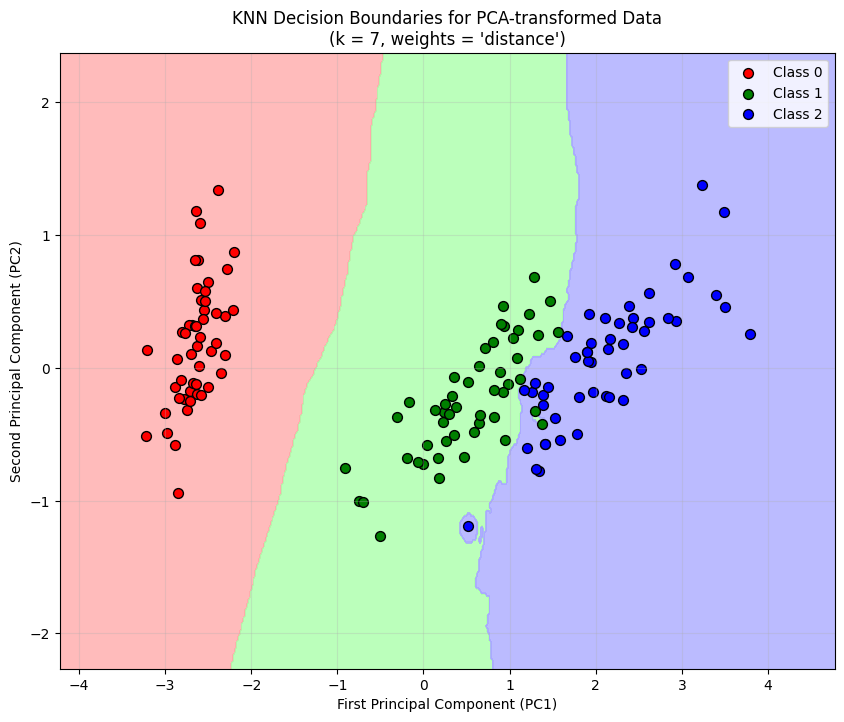

In [24]:
# Plot Decision Boundaries for PCA-transformed data

def decision_boundary_plot_pca(X_pca, y, k):
    """
    Plot decision boundaries for PCA-transformed data
    """
    h = 0.02

    n = len(set(y))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'][:n])
    cmap_bold = ['red', 'green', 'blue'][:n]

    for weights in ['uniform', 'distance']:
        clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
        clf.fit(X_pca, y)

        x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
        y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        Z = Z.reshape(xx.shape)
        plt.figure(figsize=(10, 8))
        plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

        for i in range(n):
            class_points = X_pca[y == i]
            plt.scatter(class_points[:, 0], class_points[:, 1],
                       c=cmap_bold[i], label=f'Class {i}',
                       s=50, alpha=1.0, edgecolor="black")

        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xlabel('First Principal Component (PC1)')
        plt.ylabel('Second Principal Component (PC2)')
        plt.title(f"KNN Decision Boundaries for PCA-transformed Data\n(k = {k}, weights = '{weights}')")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

# Plot decision boundaries for k=7
decision_boundary_plot_pca(X_pca, y, k=7)

In [25]:
# Compare KNN performance on original vs PCA-transformed data

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(
    X_pca, y, test_size=0.33, random_state=17
)

knn_pca = KNeighborsClassifier(n_neighbors=7)
knn_pca.fit(X_pca_train, y_pca_train)
predictions_pca = knn_pca.predict(X_pca_test)
accuracy_pca = accuracy_score(y_pca_test, predictions_pca)

print("Performance Comparison:")
print("=" * 40)
print(f"Original 4D data accuracy: {accuracy*100:.2f}%")
print(f"PCA 2D data accuracy: {accuracy_pca*100:.2f}%")
print(f"Information retained by PCA: {sum(pca.explained_variance_ratio_)*100:.2f}%")

print("\nPCA Components Analysis:")
print("=" * 30)
print("PC1 explains {:.2f}% of variance".format(pca.explained_variance_ratio_[0]*100))
print("PC2 explains {:.2f}% of variance".format(pca.explained_variance_ratio_[1]*100))

feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
print("\nPrincipal Component Loadings:")
print("=" * 35)
components_df = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=feature_names
)
print(components_df.round(3))

print("\nConclusion:")
print("=" * 15)
print("PCA successfully reduced the dimensionality from 4D to 2D while retaining")
print(f"{sum(pca.explained_variance_ratio_)*100:.1f}% of the original variance.")
print("The Voronoi diagram and decision boundaries now show clear 2D visualizations")
print("of the data structure and classification regions.")

Performance Comparison:
Original 4D data accuracy: 94.00%
PCA 2D data accuracy: 96.00%
Information retained by PCA: 97.77%

PCA Components Analysis:
PC1 explains 92.46% of variance
PC2 explains 5.31% of variance

Principal Component Loadings:
                PC1    PC2
sepal length  0.361  0.657
sepal width  -0.085  0.730
petal length  0.857 -0.173
petal width   0.358 -0.075

Conclusion:
PCA successfully reduced the dimensionality from 4D to 2D while retaining
97.8% of the original variance.
The Voronoi diagram and decision boundaries now show clear 2D visualizations
of the data structure and classification regions.


## Section 2.3: Confusion Matrix  
In classification problems, a confusion matrix, also known as an error matrix, is a table that allows visualization of the performance of an algorithm, typically a supervised learning one. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
# print(confusion_matrix(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,13,0,0,13
1,0,22,0,22
2,0,3,12,15
All,13,25,12,50


Text(0.5, 23.52222222222222, 'Predicted label')

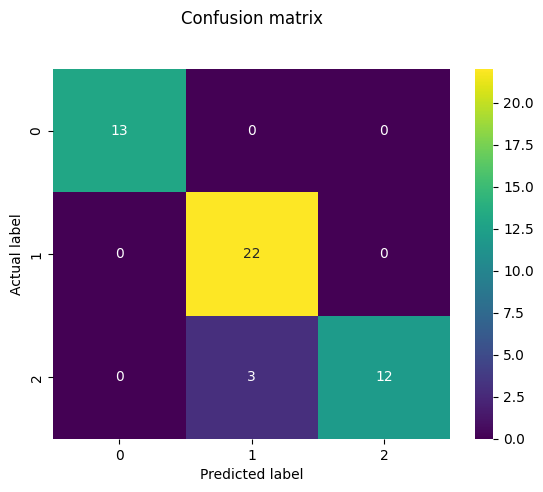

In [28]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Section 2.4: Classification Report

Precision, Recall, and F1-Score are other metrics besides accuracy that one might look for in an algorithm.  Depending on the use-case, one might consider one metric more important than the other.  

Note: *T-> True, F->False, P->Positive, N->Negative*
    
Mathematically, Accuracy is :  

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$  

**Precision**: The accuracy of positive predictions


$Precision = \frac{TP}{TP+FP}$

**Recall**:Fraction of positives that were correctly identified


$Recall = \frac{TP}{TP+FN}$


**F1-score**: Harmonic mean of precision and recall  


$F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$  



In [29]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.94        22
           2       1.00      0.80      0.89        15

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50



### **Car Evaluation Dataset**

In [30]:
# Upload the Car evaluation data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [31]:
car_df = pd.read_csv('car_evaluation.csv')
car_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [32]:
for x in car_df.columns:
  # print(x)
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])

car_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [33]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 89.88 %


In [ ]:
## TASK-3
## Plot a Confusion Matrix for the results of the Car evaluation dataset

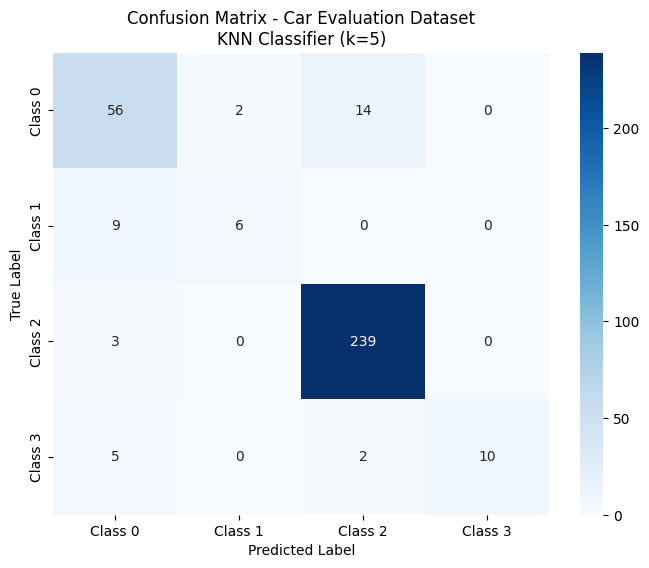

Confusion Matrix as Crosstab:
Predicted   0  1    2   3  All
True                          
0          56  2   14   0   72
1           9  6    0   0   15
2           3  0  239   0  242
3           5  0    2  10   17
All        73  8  255  10  346

Dataset Information:
Total test samples: 346
Number of classes: 4
Accuracy: 0.8988 (89.88%)


In [35]:
# TASK-3 Solution: Plot Confusion Matrix for Car evaluation dataset

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix - Car Evaluation Dataset\nKNN Classifier (k=5)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("Confusion Matrix as Crosstab:")
print("="*40)
confusion_crosstab = pd.crosstab(y_test, predictions,
                                rownames=['True'],
                                colnames=['Predicted'],
                                margins=True)
print(confusion_crosstab)

print(f"\nDataset Information:")
print(f"Total test samples: {len(y_test)}")
print(f"Number of classes: {len(np.unique(y_test))}")
print(f"Accuracy: {score:.4f} ({score*100:.2f}%)")

In [ ]:
## TASK-4
## Print a Classification Report for the results of the Car evaluation dataset

In [36]:
# TASK-4 Solution: Print Classification Report for Car evaluation dataset

from sklearn.metrics import classification_report, precision_recall_fscore_support

print("Classification Report for Car Evaluation Dataset")
print("=" * 55)
print(classification_report(y_test, predictions,
                          target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3']))

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, predictions)

print("\nDetailed Metrics Analysis:")
print("=" * 30)
print(f"{'Class':<8} {'Precision':<10} {'Recall':<8} {'F1-Score':<10} {'Support':<8}")
print("-" * 50)

for i in range(len(precision)):
    print(f"Class {i}  {precision[i]:.4f}     {recall[i]:.4f}   {f1_score[i]:.4f}     {support[i]}")

macro_precision = precision.mean()
macro_recall = recall.mean()
macro_f1 = f1_score.mean()

weighted_precision = (precision * support).sum() / support.sum()
weighted_recall = (recall * support).sum() / support.sum()
weighted_f1 = (f1_score * support).sum() / support.sum()

print("\nAverage Metrics:")
print("-" * 20)
print(f"Macro avg    {macro_precision:.4f}     {macro_recall:.4f}   {macro_f1:.4f}     {support.sum()}")
print(f"Weighted avg {weighted_precision:.4f}     {weighted_recall:.4f}   {weighted_f1:.4f}     {support.sum()}")

print(f"\nOverall Accuracy: {score:.4f} ({score*100:.2f}%)")

print(f"\nKey Insights:")
print(f"- Best performing class (highest F1-score): Class {np.argmax(f1_score)}")
print(f"- Worst performing class (lowest F1-score): Class {np.argmin(f1_score)}")
print(f"- Most frequent class in test set: Class {np.argmax(support)}")
print(f"- Least frequent class in test set: Class {np.argmin(support)}")

print(f"\nClass Distribution in Test Set:")
print("-" * 35)
unique, counts = np.unique(y_test, return_counts=True)
for class_label, count in zip(unique, counts):
    percentage = (count / len(y_test)) * 100
    print(f"Class {class_label}: {count} samples ({percentage:.1f}%)")

Classification Report for Car Evaluation Dataset
              precision    recall  f1-score   support

     Class 0       0.77      0.78      0.77        72
     Class 1       0.75      0.40      0.52        15
     Class 2       0.94      0.99      0.96       242
     Class 3       1.00      0.59      0.74        17

    accuracy                           0.90       346
   macro avg       0.86      0.69      0.75       346
weighted avg       0.90      0.90      0.89       346


Detailed Metrics Analysis:
Class    Precision  Recall   F1-Score   Support 
--------------------------------------------------
Class 0  0.7671     0.7778   0.7724     72
Class 1  0.7500     0.4000   0.5217     15
Class 2  0.9373     0.9876   0.9618     242
Class 3  1.0000     0.5882   0.7407     17

Average Metrics:
--------------------
Macro avg    0.8636     0.6884   0.7492     346
Weighted avg 0.8968     0.8988   0.8924     346

Overall Accuracy: 0.8988 (89.88%)

Key Insights:
- Best performing class (highe

In [ ]:
## TASK-5
## Plot the Decision boundary diagram for the classifier of the Car evaluation dataset

TASK-5: Decision Boundary Visualization for Car Evaluation Dataset
Original Car dataset shape: (1727, 6)
Number of features: 6
Number of classes: 4
Dataset shape after PCA: (1727, 2)
Explained variance ratio: [0.21758303 0.21758303]
Total explained variance: 43.52%

Plotting Decision Boundaries...


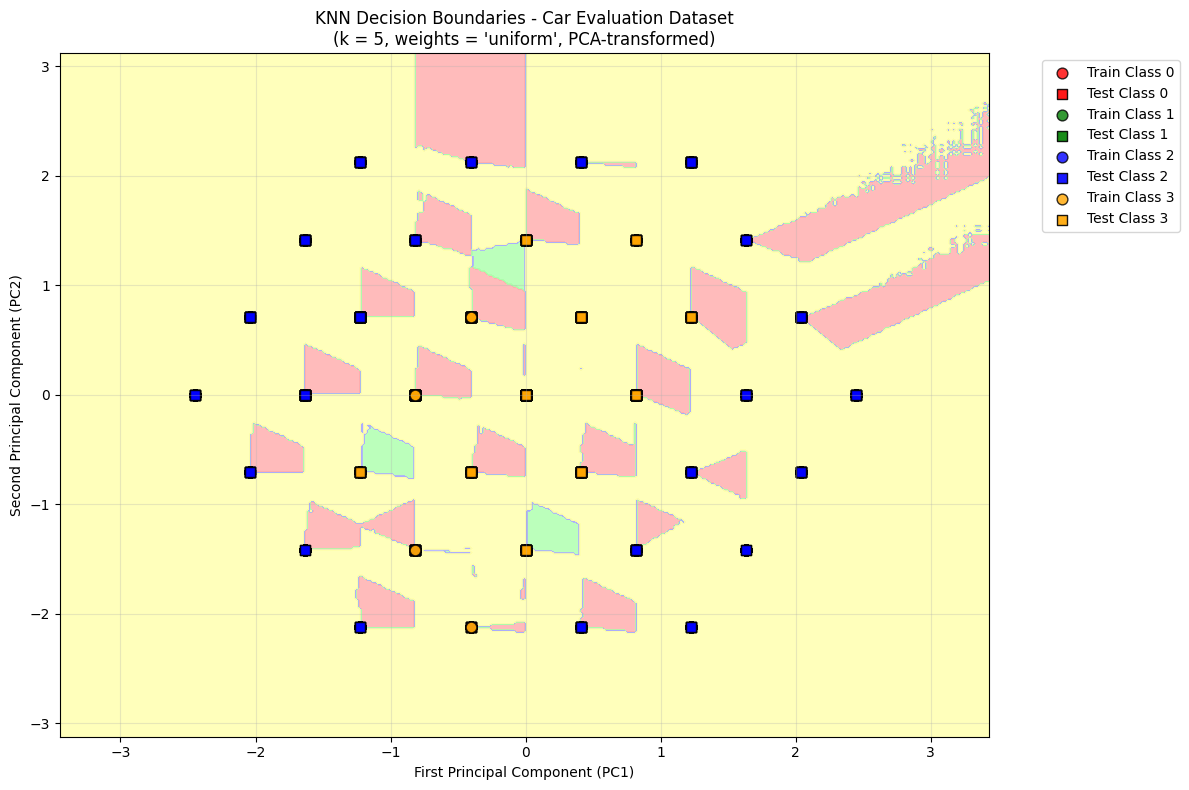

Accuracy with uniform weights on PCA-transformed data: 62.72%


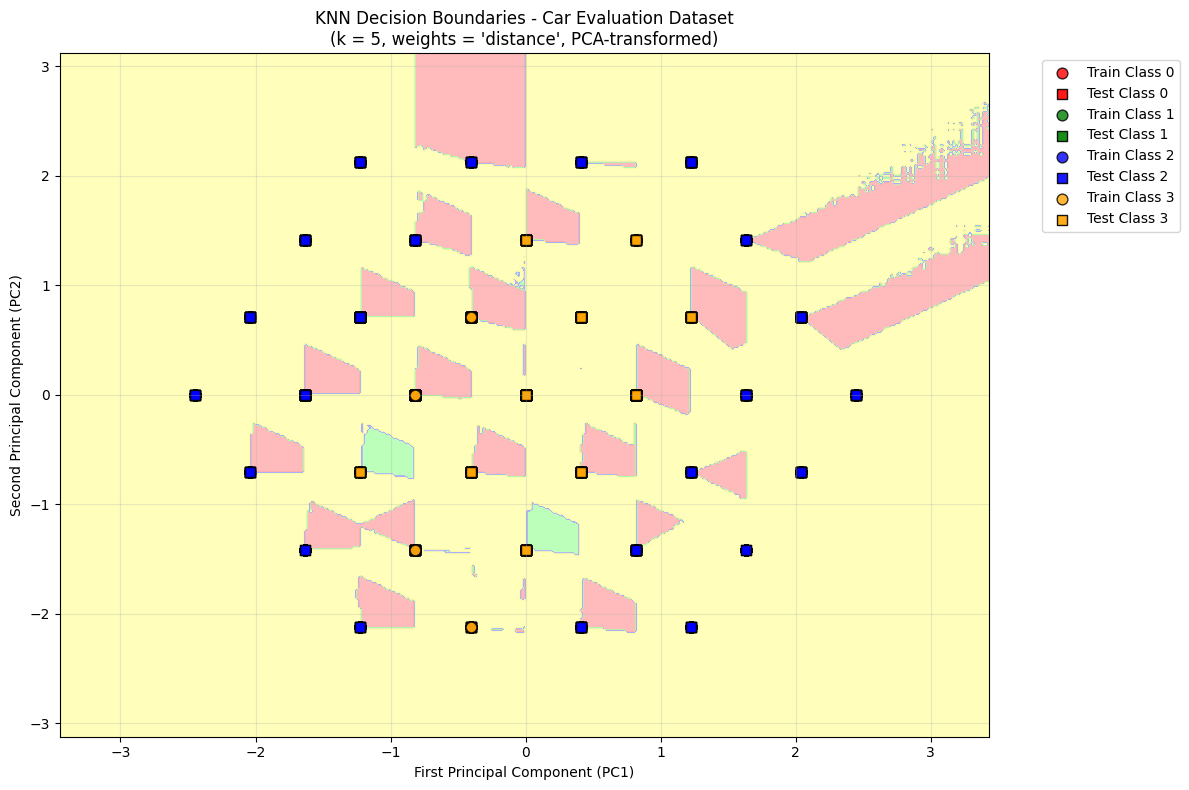

Accuracy with distance weights on PCA-transformed data: 62.72%

Comparison:
Original 6D data accuracy: 89.88%
PCA 2D data retains 43.52% of variance

PCA Components Analysis:
PC1 explains 21.76% of variance
PC2 explains 21.76% of variance

Note: The decision boundaries show how the KNN classifier
separates different car evaluation classes in the 2D PCA space.
Training points are shown as circles, test points as squares.


In [37]:
# TASK-5 Solution: Plot Decision Boundary Diagram for Car evaluation dataset

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

print("TASK-5: Decision Boundary Visualization for Car Evaluation Dataset")
print("=" * 65)

X_car_combined = np.vstack([X_train, X_test])
y_car_combined = np.hstack([y_train, y_test])

print(f"Original Car dataset shape: {X_car_combined.shape}")
print(f"Number of features: {X_car_combined.shape[1]}")
print(f"Number of classes: {len(np.unique(y_car_combined))}")


pca_car = PCA(n_components=2)
X_car_pca = pca_car.fit_transform(X_car_combined)

print(f"Dataset shape after PCA: {X_car_pca.shape}")
print(f"Explained variance ratio: {pca_car.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca_car.explained_variance_ratio_)*100:.2f}%")

X_train_pca = X_car_pca[:len(X_train)]
X_test_pca = X_car_pca[len(X_train):]

def decision_boundary_plot_car(X_train_pca, y_train, X_test_pca, y_test, k=5):
    """
    Plot decision boundaries for Car evaluation dataset using PCA-transformed data
    """
    h = 0.02

    n_classes = len(np.unique(y_train))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA'][:n_classes])
    cmap_bold = ['red', 'green', 'blue', 'orange'][:n_classes]

    for weights in ['uniform', 'distance']:
        clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
        clf.fit(X_train_pca, y_train)

        x_min, x_max = X_car_pca[:, 0].min() - 1, X_car_pca[:, 0].max() + 1
        y_min, y_max = X_car_pca[:, 1].min() - 1, X_car_pca[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        Z = Z.reshape(xx.shape)
        plt.figure(figsize=(12, 8))
        plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

        for i in range(n_classes):
            class_points_train = X_train_pca[y_train == i]
            class_points_test = X_test_pca[y_test == i]

            plt.scatter(class_points_train[:, 0], class_points_train[:, 1],
                       c=cmap_bold[i], label=f'Train Class {i}',
                       s=60, alpha=0.8, edgecolor="black", marker='o')

            plt.scatter(class_points_test[:, 0], class_points_test[:, 1],
                       c=cmap_bold[i], label=f'Test Class {i}',
                       s=60, alpha=0.9, edgecolor="black", marker='s')

        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xlabel('First Principal Component (PC1)')
        plt.ylabel('Second Principal Component (PC2)')
        plt.title(f"KNN Decision Boundaries - Car Evaluation Dataset\n(k = {k}, weights = '{weights}', PCA-transformed)")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        test_predictions = clf.predict(X_test_pca)
        test_accuracy = accuracy_score(y_test, test_predictions)
        print(f"Accuracy with {weights} weights on PCA-transformed data: {test_accuracy*100:.2f}%")

print(f"\nPlotting Decision Boundaries...")
decision_boundary_plot_car(X_train_pca, y_train, X_test_pca, y_test, k=5)

print(f"\nComparison:")
print(f"Original 6D data accuracy: {score*100:.2f}%")
print(f"PCA 2D data retains {sum(pca_car.explained_variance_ratio_)*100:.2f}% of variance")

print(f"\nPCA Components Analysis:")
print(f"PC1 explains {pca_car.explained_variance_ratio_[0]*100:.2f}% of variance")
print(f"PC2 explains {pca_car.explained_variance_ratio_[1]*100:.2f}% of variance")

print(f"\nNote: The decision boundaries show how the KNN classifier")
print(f"separates different car evaluation classes in the 2D PCA space.")
print(f"Training points are shown as circles, test points as squares.")

In [ ]:
## TASK-6
## Plot the Voronoi diagram for the classifier of the Car evaluation dataset

TASK-6: Voronoi Diagram Visualization for Car Evaluation Dataset
Using PCA-transformed data from previous task...
Dataset shape for Voronoi: (1727, 2)
Number of data points: 1727
Number of classes: 4


/tmp/ipython-input-1783275263.py:168: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


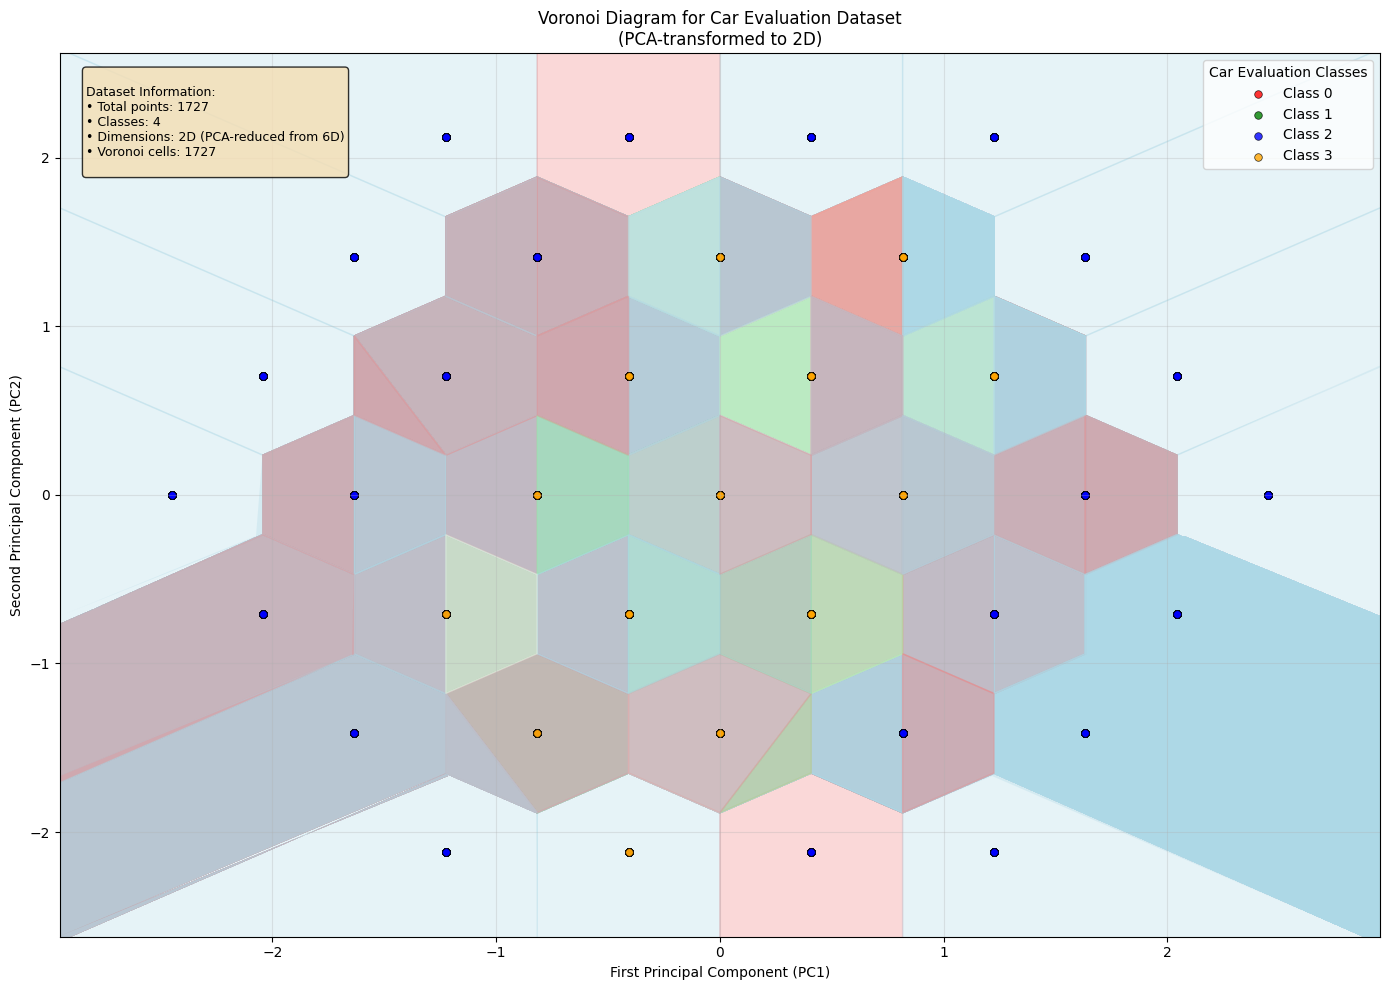


Voronoi Diagram Analysis:
Total Voronoi cells created: 1727
Valid regions (with > 2 vertices): 1363

Class Distribution in Dataset:
-----------------------------------
Class 0: 384 points (22.2%)
Class 1: 69 points (4.0%)
Class 2: 1209 points (70.0%)
Class 3: 65 points (3.8%)

Note:
- Each point represents a car evaluation sample in 2D PCA space
- Voronoi cells show regions where each point has the strongest influence
- Colors represent different car evaluation classes
- This visualization helps understand the spatial distribution of classes


<Figure size 1200x800 with 0 Axes>

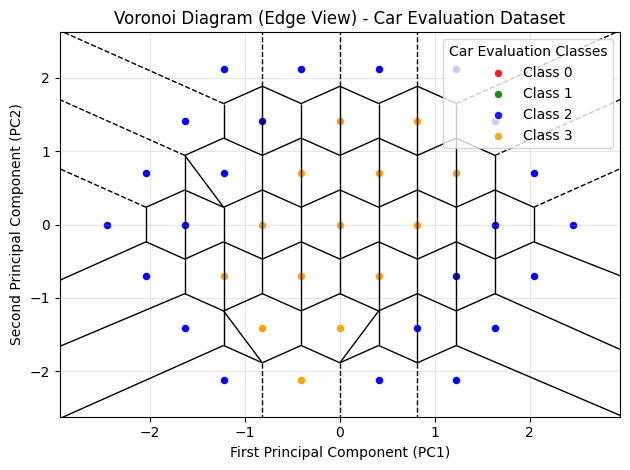

In [40]:
# TASK-6 Solution: Plot Voronoi Diagram for Car evaluation dataset

# We'll use the PCA-transformed data from the previous task to create a 2D Voronoi diagram

from scipy.spatial import Voronoi
import matplotlib.pyplot as plt
import numpy as np

print("TASK-6: Voronoi Diagram Visualization for Car Evaluation Dataset")
print("=" * 65)

def voronoi_finite_polygons_2d_car(vor, radius=None):
    """
    Modified Voronoi function for Car evaluation dataset
    """
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = np.ptp(vor.points).max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        # Check if p1 exists in all_ridges to avoid KeyError
        if p1 not in all_ridges:
            # If no ridges for this point, skip it or add empty region
            new_regions.append([])
            continue

        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge
            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        if len(new_region) >= 3:  # Only sort if we have enough points
            vs = np.asarray([new_vertices[v] for v in new_region])
            c = vs.mean(axis=0)
            angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
            new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

# Check if we have the PCA-transformed data from the previous task
# If not, we need to recreate it
try:
    # Try to use existing PCA-transformed data
    X_car_pca_points = X_car_pca
    y_car_labels = y_car_combined
    print("Using PCA-transformed data from previous task...")
except NameError:
    # If PCA data doesn't exist, create it
    print("Creating PCA-transformed data...")
    from sklearn.decomposition import PCA

    # Combine train and test sets for PCA transformation
    X_car_combined = np.vstack([X_train, X_test])
    y_car_combined = np.hstack([y_train, y_test])

    # Apply PCA to reduce 6D to 2D
    pca_car = PCA(n_components=2)
    X_car_pca_points = pca_car.fit_transform(X_car_combined)
    y_car_labels = y_car_combined

    print(f"PCA transformation complete. Explained variance: {sum(pca_car.explained_variance_ratio_)*100:.2f}%")

print(f"Dataset shape for Voronoi: {X_car_pca_points.shape}")
print(f"Number of data points: {len(X_car_pca_points)}")
print(f"Number of classes: {len(np.unique(y_car_labels))}")

# Create Voronoi tessellation using PCA-transformed data
vor_car = Voronoi(X_car_pca_points)

# Get finite regions
regions_car, vertices_car = voronoi_finite_polygons_2d_car(vor_car)

# Create the Voronoi diagram plot
plt.figure(figsize=(14, 10))

# Plot Voronoi regions with light colors
colors_light = ['lightcoral', 'lightgreen', 'lightblue', 'lightyellow']
for i, region in enumerate(regions_car):
    if len(region) > 2:  # Need at least 3 points for a valid polygon
        try:
            polygon = vertices_car[region]
            if len(polygon) > 2:  # Double check polygon validity
                # Color based on the class of the point
                point_class = y_car_labels[i] if i < len(y_car_labels) else 0
                color = colors_light[int(point_class) % len(colors_light)]
                plt.fill(*zip(*polygon), alpha=0.3, color=color)
        except (IndexError, ValueError) as e:
            # Skip invalid regions
            continue

# Plot the data points colored by class
colors_bold = ['red', 'green', 'blue', 'orange']
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

for class_label in np.unique(y_car_labels):
    class_points = X_car_pca_points[y_car_labels == class_label]
    plt.scatter(class_points[:, 0], class_points[:, 1],
               c=colors_bold[int(class_label)],
               label=class_names[int(class_label)],
               s=30, alpha=0.8, edgecolor='black', linewidth=0.5)

# Set plot boundaries
plt.xlim(vor_car.min_bound[0] - 0.5, vor_car.max_bound[0] + 0.5)
plt.ylim(vor_car.min_bound[1] - 0.5, vor_car.max_bound[1] + 0.5)

# Add labels and title
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.title('Voronoi Diagram for Car Evaluation Dataset\n(PCA-transformed to 2D)')
plt.legend(title='Car Evaluation Classes')
plt.grid(True, alpha=0.3)

# Add text box with information
info_text = f"""
Dataset Information:
• Total points: {len(X_car_pca_points)}
• Classes: {len(np.unique(y_car_labels))}
• Dimensions: 2D (PCA-reduced from 6D)
• Voronoi cells: {len(regions_car)}
"""

plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Additional analysis
print(f"\nVoronoi Diagram Analysis:")
print("=" * 30)
print(f"Total Voronoi cells created: {len(regions_car)}")
print(f"Valid regions (with > 2 vertices): {sum(1 for region in regions_car if len(vertices_car[region]) > 2)}")

# Show class distribution
print(f"\nClass Distribution in Dataset:")
print("-" * 35)
unique_classes, class_counts = np.unique(y_car_labels, return_counts=True)
for class_label, count in zip(unique_classes, class_counts):
    percentage = (count / len(y_car_labels)) * 100
    print(f"Class {int(class_label)}: {count} points ({percentage:.1f}%)")

print(f"\nNote:")
print(f"- Each point represents a car evaluation sample in 2D PCA space")
print(f"- Voronoi cells show regions where each point has the strongest influence")
print(f"- Colors represent different car evaluation classes")
print(f"- This visualization helps understand the spatial distribution of classes")

# Create a simplified version showing only the Voronoi edges
plt.figure(figsize=(12, 8))

# Plot just the Voronoi edges
from scipy.spatial import voronoi_plot_2d
voronoi_plot_2d(vor_car, show_vertices=False, line_colors='black', line_width=1, point_size=0)

# Overlay the data points
for class_label in np.unique(y_car_labels):
    class_points = X_car_pca_points[y_car_labels == class_label]
    plt.scatter(class_points[:, 0], class_points[:, 1],
               c=colors_bold[int(class_label)],
               label=class_names[int(class_label)],
               s=40, alpha=0.9, edgecolor='white', linewidth=1)

plt.xlim(vor_car.min_bound[0] - 0.5, vor_car.max_bound[0] + 0.5)
plt.ylim(vor_car.min_bound[1] - 0.5, vor_car.max_bound[1] + 0.5)
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.title('Voronoi Diagram (Edge View) - Car Evaluation Dataset')
plt.legend(title='Car Evaluation Classes')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Questions to Think About and Answer
1. In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the _weights_ set to 'uniform' and then set to 'distance'. Find out the difference between these two.  
2. What do you think could be the drawbacks of using KNN ?

### Answers to the Questions

#### **Question 1: Difference between 'uniform' and 'distance' weights in KNN**

In KNN classification, the `weights` parameter determines how the algorithm weighs the votes of the k nearest neighbors when making predictions:

**1. Uniform Weights (`weights='uniform'`)**
- **Definition**: All k nearest neighbors have equal voting power regardless of their distance from the query point
- **How it works**: Each neighbor gets exactly 1 vote, and the class with the most votes wins
- **Example**: If k=5 and we find 3 neighbors of class A and 2 neighbors of class B, class A wins (3 > 2)
- **Use case**: Works well when neighbors are roughly equidistant or when all neighbors are equally reliable

**2. Distance Weights (`weights='distance'`)**
- **Definition**: Neighbors that are closer to the query point get more voting power than farther neighbors
- **How it works**: Each neighbor's vote is weighted by the inverse of its distance (weight = 1/distance)
- **Mathematical formula**: weight_i = 1 / distance_i (closer neighbors have higher weights)
- **Example**: A neighbor at distance 0.1 gets weight 10, while a neighbor at distance 0.5 gets weight 2
- **Use case**: More accurate when some neighbors are much closer than others

**Key Differences:**
- **Sensitivity**: Distance weighting is more sensitive to the closest neighbors
- **Outlier handling**: Distance weighting can be less affected by distant outliers in the k-neighborhood
- **Decision boundaries**: Distance weighting typically creates smoother, more continuous decision boundaries
- **Performance**: Distance weighting often performs better when neighbors are not uniformly distributed

#### **Question 2: Drawbacks of using KNN**

While KNN is a simple and intuitive algorithm, it has several significant limitations:

**1. Computational Complexity**
- **Training**: O(1) - No training phase (lazy learning)
- **Prediction**: O(n*d) for each query - Must compute distance to all training samples
- **Problem**: Becomes very slow with large datasets
- **Impact**: Not suitable for real-time applications with large datasets

**2. Storage Requirements**
- **Memory usage**: Must store the entire training dataset
- **Problem**: Memory-intensive for large datasets
- **Impact**: Not scalable for big data applications

**3. Curse of Dimensionality**
- **Problem**: Performance degrades in high-dimensional spaces
- **Reason**: In high dimensions, all points tend to be equidistant
- **Effect**: Nearest neighbors may not be meaningful
- **Solution**: Dimensionality reduction (PCA, feature selection) often required

**4. Sensitivity to Feature Scaling**
- **Problem**: Features with larger scales dominate distance calculations
- **Example**: Age (0-100) vs Income (0-100,000) - income will dominate
- **Solution**: Feature normalization/standardization is essential
- **Impact**: Poor performance without proper preprocessing

**5. Sensitivity to Irrelevant Features**
- **Problem**: Noise and irrelevant features affect distance calculations
- **Effect**: Can make similar instances appear dissimilar
- **Impact**: Reduced classification accuracy
- **Solution**: Feature selection and dimensionality reduction

**6. Choice of k and Distance Metric**
- **k selection**: No universal rule for choosing optimal k
- **Too small k**: Sensitive to noise and outliers
- **Too large k**: May include too many irrelevant neighbors
- **Distance metric**: Euclidean may not be optimal for all data types
- **Impact**: Requires experimentation and domain knowledge

**7. Imbalanced Data Issues**
- **Problem**: Majority classes can dominate predictions
- **Example**: If 90% of neighbors belong to one class, it will likely win
- **Effect**: Poor performance on minority classes
- **Solution**: Weighted voting or sampling techniques needed

**8. Poor Performance with Sparse Data**
- **Problem**: In sparse datasets, finding meaningful neighbors is difficult
- **Effect**: Most points are equally distant
- **Impact**: Predictions become unreliable

**9. No Model Interpretability**
- **Problem**: Doesn't provide insights into feature importance
- **Limitation**: Cannot explain why certain features matter
- **Impact**: Less useful for understanding underlying patterns

**10. Boundary Issues**
- **Problem**: Performance depends heavily on local neighborhood structure
- **Effect**: May perform poorly near class boundaries
- **Limitation**: Not robust to local variations in data density

### Useful Resources for further reading
1. Interactive KNN visualization, with class boundaries: http://vision.stanford.edu/teaching/cs231n-demos/knn/  
